In [1]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

In [2]:
image = plt.imread('label-1/DRIVE_13.png')

In [3]:
image.shape

(584, 565)

In [4]:
image = plt.imread('label-1/CHASE_15.png')
image.shape

(960, 999)

In [5]:
image = plt.imread('label-1/DRIVE_11.png')
image.shape

(584, 565)

In [6]:
image = plt.imread('pre-processed/CHASE_03.png')
image.shape

(960, 999)

In [7]:
image = plt.imread('label-2/DRIVE_21.png')
image.shape

(584, 565)

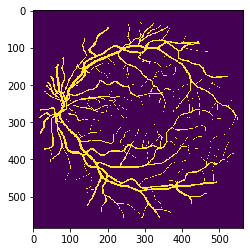

In [8]:
plt.imshow(image)

In [9]:
from glob import glob

In [10]:
files = glob('label-1/*.png')
for file in files:
    img = plt.imread(file)
    assert len(img.shape) == 2

In [11]:
files = glob('label-2/*.png')
for file in files:
    img = plt.imread(file)
    assert len(img.shape) == 2

In [12]:
files = glob('pre-processed/*.png')
for file in files:
    img = plt.imread(file)
    assert len(img.shape) == 2

In [13]:
img = plt.imread('label-1/CHASE_03.png')

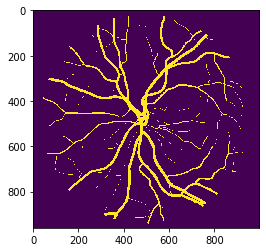

In [14]:
plt.imshow(img)

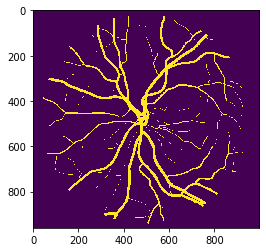

In [15]:
plt.imshow(np.array(img, dtype=np.uint8))

In [16]:
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
np.max(img)

1.0

In [18]:
import cv2

In [19]:
image = cv2.imread('label-1/CHASE_03.png')

In [20]:
image.shape

(960, 999, 3)

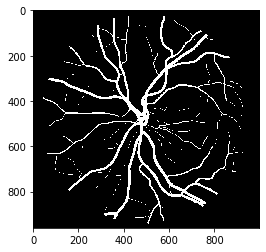

In [21]:
plt.imshow(image)

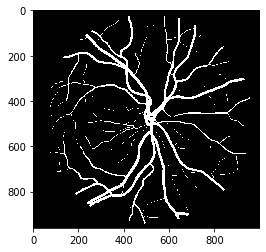

In [22]:
plt.imshow(image[:, ::-1, :])

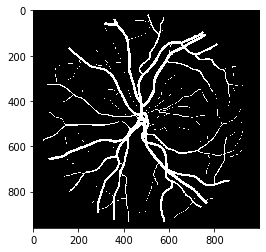

In [23]:
plt.imshow(image[::-1, :, :])

In [24]:
image.shape

(960, 999, 3)

In [25]:
from PIL import Image

In [26]:
img = np.asarray(Image.open('label-1/CHASE_03.png'))

In [27]:
img.shape

(960, 999)

In [28]:
cv2.resize(img, (500, int(960/999*500))).shape

(480, 500)

### Add Noise

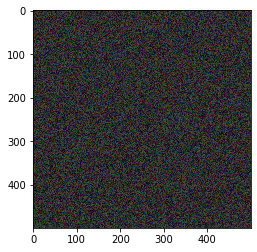

In [29]:
plt.imshow(np.clip(np.random.randint(0, int(256*np.random.randint(100, 500) / 1000), size=(500,500,3)), 0, 255))

In [30]:
def add_noise(img):
    max_val = 255
    prob = np.random.randint(5, 100) / 1000
    randn = np.random.randint(-int(max_val*prob), int(max_val*prob), size=(img.shape))
    if np.max(img) <= 1:
        randn = randn / 255
        max_val = 1
    return np.clip(img + randn, 0, max_val)

In [31]:
img = np.asarray(Image.open('pre-processed/STARE_02.png'))

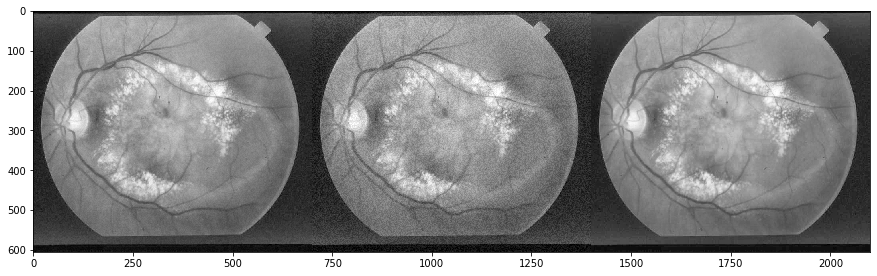

In [32]:
plt.figure(figsize=(15,15))
plt.imshow(
    np.repeat(
        np.expand_dims(
            np.concatenate([add_noise(img), add_noise(img), img], axis=1), 
            axis=-1), 
        [3], axis=-1)
)

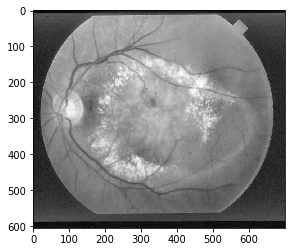

In [33]:
plt.imshow(np.repeat(np.expand_dims(img, axis=-1), [3], axis=-1))